Import and Explore Data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Titanic dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Check for missing values
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
# Check if Duplicates Exist
df.duplicated().sum()

np.int64(107)

Cleaning Data

In [6]:
# Drop Duplicates
df.drop_duplicates(inplace=True)
# Verify Duplicates are removed
df.duplicated().sum()

np.int64(0)

In [7]:
# Handling missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
df.drop(columns=['deck'], inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20168\3809137824.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\DELL\AppData\Local\Temp\ipykernel_20168\3809137824.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [8]:
# Checking Missing Values Again
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.select_dtypes(include=['object', 'category']).columns:
    df[column] = le.fit_transform(df[column])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


Data Visualization

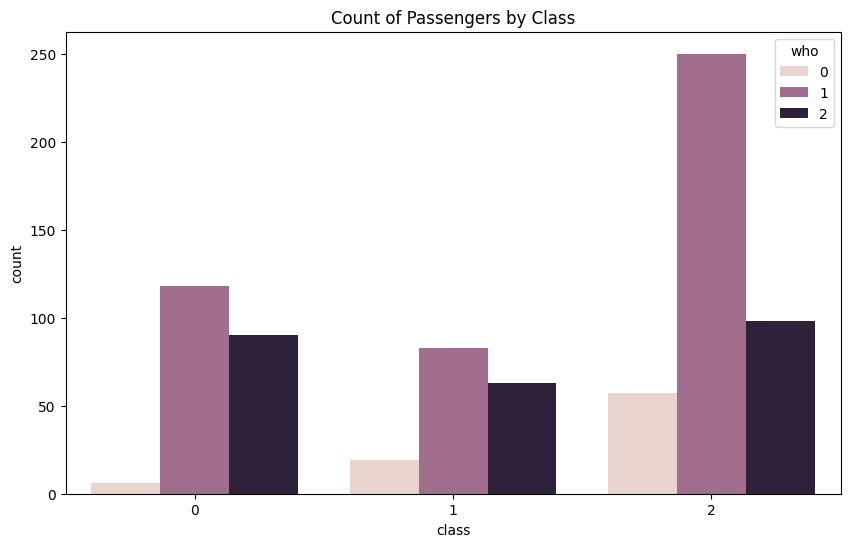

In [10]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='class', hue='who', data=df)
plt.title('Count of Passengers by Class')
plt.show()

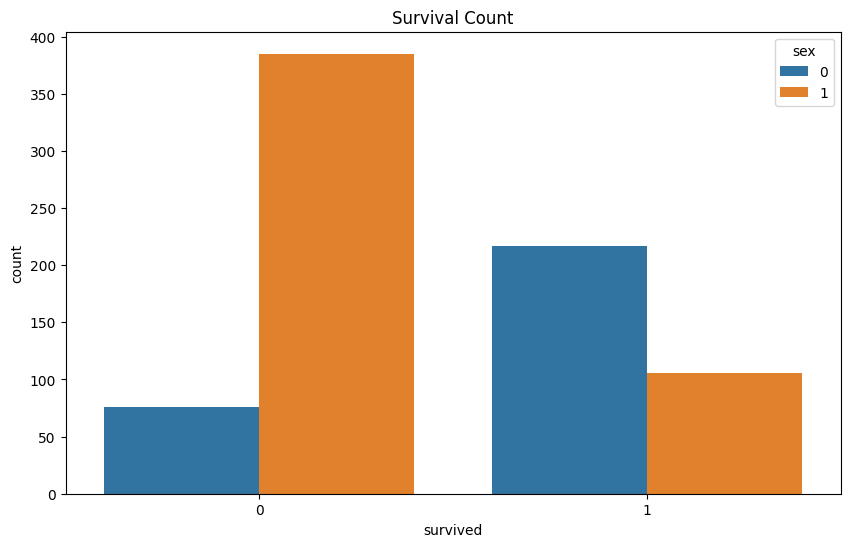

In [11]:
# Survival by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='survived', hue='sex', data=df)
plt.title('Survival Count')
plt.show()

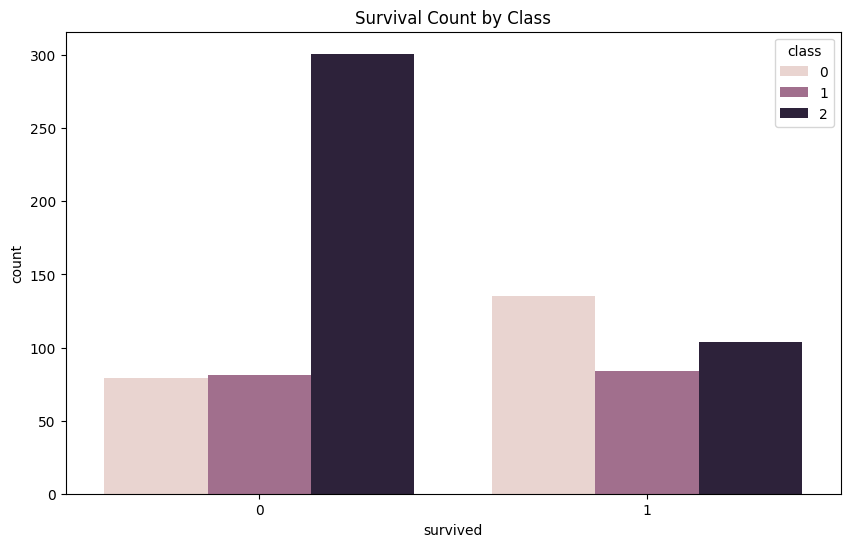

In [12]:
# Survival by Class
plt.figure(figsize=(10, 6))
sns.countplot(x='survived', hue='class', data=df)
plt.title('Survival Count by Class')
plt.show()

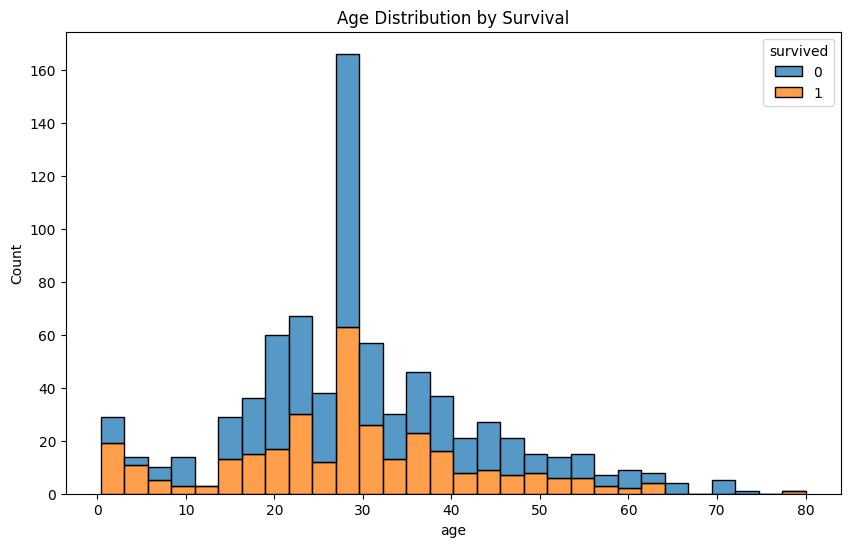

In [13]:
# Survival by Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='survived', multiple='stack', bins=30)
plt.title('Age Distribution by Survival')
plt.show()

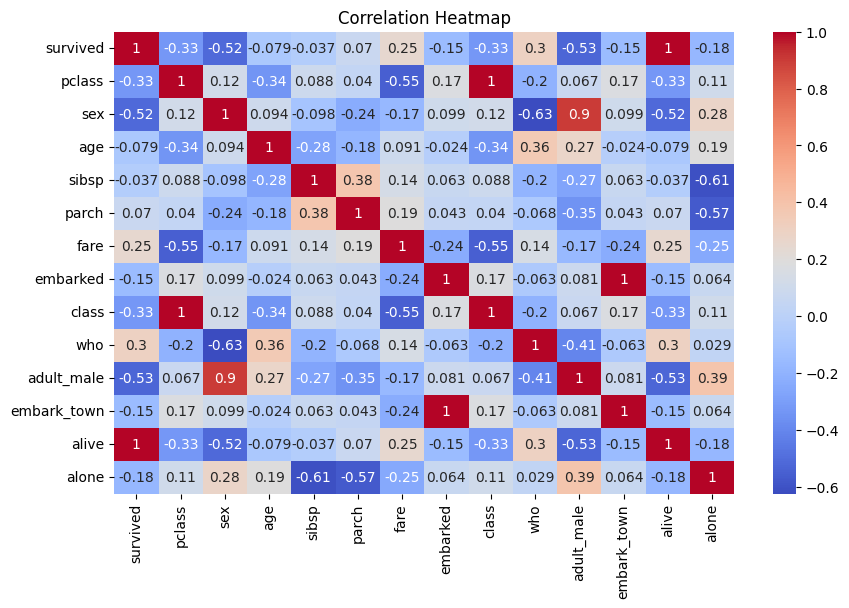

In [14]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Summary Statistics and Group-based Insights

In [15]:
print(df.groupby('sex')['survived'].mean())
print(df.groupby('pclass')['survived'].mean())


sex
0    0.740614
1    0.215886
Name: survived, dtype: float64
pclass
1    0.630841
2    0.509091
3    0.256790
Name: survived, dtype: float64


Advanced EDA

In [16]:
import dtale
d = dtale.show(df)
d.open_browser()